"""
Example of Lomb-Scargle Algorithm
---------------------------------
Figure 10.15

Example of a Lomb-Scargle periodogram. The data include 30 points drawn from
the function y(t|P) = 10 + sin(2pi t/P) with P = 0.3. Heteroscedastic Gaussian
noise is added to the observations, with a width drawn from a uniform
distribution with 0.5 < sigma < 1.0. Data are shown in the top panel and the
resulting Lomb-Scargle periodogram is shown in the bottom panel. The arrow
marks the location of the true period. The dotted lines show the 1% and 5%
significance levels for the highest peak, determined by 1000 bootstrap 
resamplings (see Section 10.3.2). The change in BIC compared to a nonvarying
source (eq. 10.55) is shown on the right y-axis. The maximum power corresponds
to a delta-BIC = 26.1,indicating the presence of a periodic signal.
Bootstrapping indicates the period is detected at ~ 5% significance.

"""

In [57]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle

from scipy import integrate
import astropy
from astropy.time import Time

import pyfits
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

In [ ]:

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate Data
np.random.seed(0)
N = 30
P = 0.3

t = np.random.randint(100, size=N) + 0.3 + 0.4 * np.random.random(N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = np.random.normal(y, dy)

#------------------------------------------------------------
# Compute periodogram
period = 10 ** np.linspace(-1, 0, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
ax.set_xlim(-5, 105)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.85)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

plt.show()


In [77]:
import numpy as np
import pandas as pd

dataJ1422=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/J1422+3223.csv')
data3c273=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273time.csv')

In [ ]:
dataJ1422

In [ ]:
data3c273

In [ ]:
dataJ1422['# mjd'].values[-1]-dataJ1422['# mjd'].values[0]

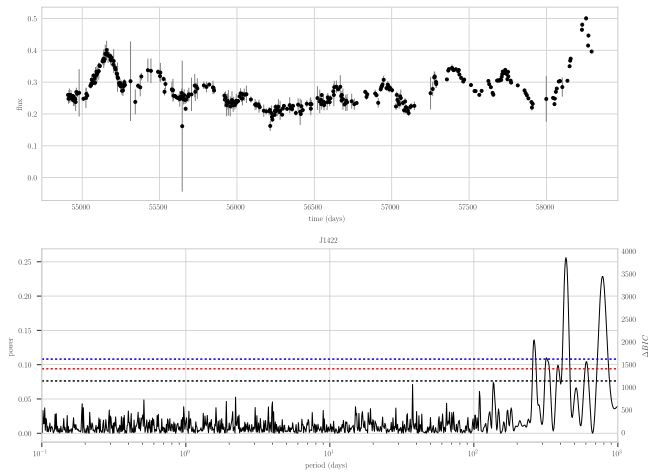

In [94]:
t = dataJ1422['# mjd']
dy =dataJ1422['flux err']
y_obs= dataJ1422['flux']


# Compute periodogram
period = 10 ** np.linspace(-1, 3, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
plt.grid()
plt.title('J1422')
fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/j1422_pds_sig_level.pdf')
#plt.show()

In [ ]:
data3c273['mjd'].values[-1]-data3c273['mjd'].values[0]

In [79]:
def getrangedata(t,dy,y_obs,rangemin,rangemax):
    tnew=[]
    dynew=[]
    y_obsnew=[]
    for i,(t_,dy_,y_obs_) in enumerate(zip(t,dy,y_obs)):
        if (t_>rangemin and t_<rangemax):
            tnew.append(t_)
            dynew.append(dy_)
            y_obsnew.append(y_obs_)
    return tnew,dynew,y_obsnew 

In [ ]:
plt.plot(t,y_obs)

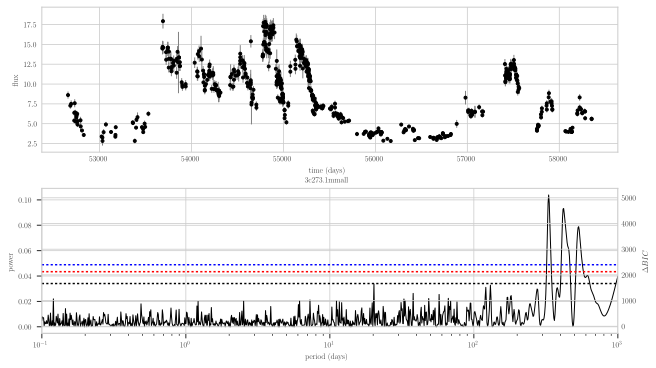

In [92]:
t = data3c273[data3c273['BAND']=='1mm']['mjd']
dy =data3c273[data3c273['BAND']=='1mm']['ERROR']
y_obs= data3c273[data3c273['BAND']=='1mm']['FLUX(JY)']
#t,dy,y_obs=getrangedata(t1mm,dy1mm,y_obs1mm,rangemin=53600,rangemax=55500)

# Compute periodogram
period = 10 ** np.linspace(-1, 3, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))

plt.title('3c273.1mmall')
fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273_1mm_pds_sig_level_all.pdf')

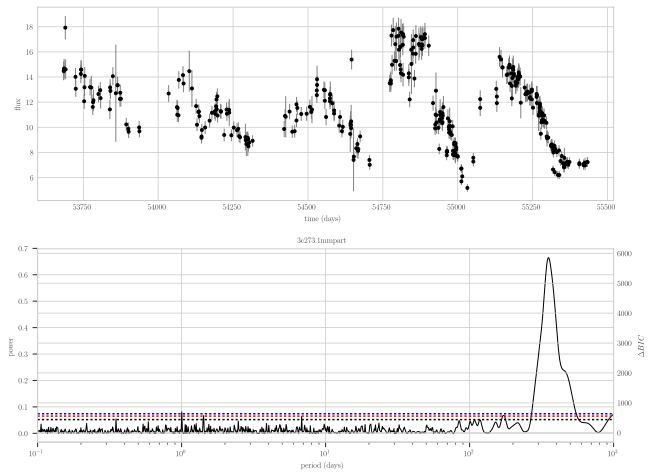

In [91]:
t1mm = data3c273[data3c273['BAND']=='1mm']['mjd']
dy1mm =data3c273[data3c273['BAND']=='1mm']['ERROR']
y_obs1mm= data3c273[data3c273['BAND']=='1mm']['FLUX(JY)']
t,dy,y_obs=getrangedata(t1mm,dy1mm,y_obs1mm,rangemin=53600,rangemax=55500)

# Compute periodogram
period = 10 ** np.linspace(-1, 3, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))

plt.title('3c273.1mmpart')
fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273_1mm_pds_sig_level_part.pdf')

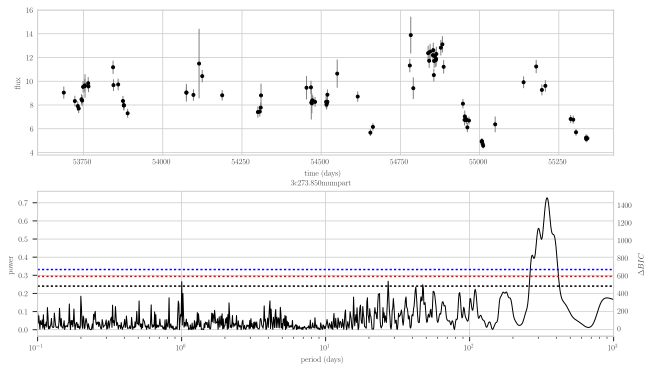

In [90]:
t850 = data3c273[data3c273['BAND']=='850']['mjd']
dy850 =data3c273[data3c273['BAND']=='850']['ERROR']
y_obs850= data3c273[data3c273['BAND']=='850']['FLUX(JY)']
t,dy,y_obs=getrangedata(t850,dy850,y_obs850,rangemin=53600,rangemax=55500)


# Compute periodogram
period = 10 ** np.linspace(-1,3, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))

plt.grid()
plt.title('3c273.850mumpart')
fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273_850mum_pds_sig_level_part.pdf')

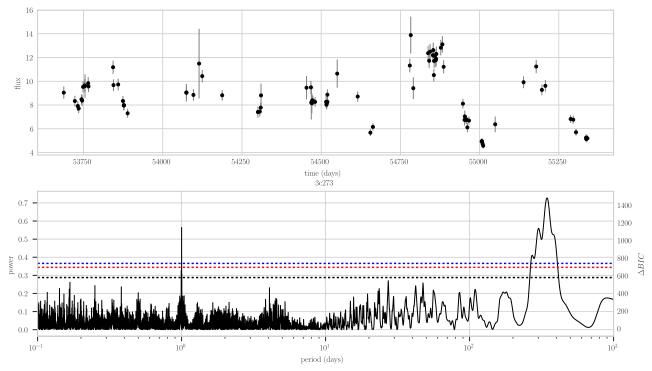

In [85]:
t850 = data3c273[data3c273['BAND']=='850']['mjd']
dy850 =data3c273[data3c273['BAND']=='850']['ERROR']
y_obs850= data3c273[data3c273['BAND']=='850']['FLUX(JY)']
t,dy,y_obs=getrangedata(t850,dy850,y_obs850,rangemin=53600,rangemax=55500)


# Compute periodogram
period = 10 ** np.linspace(-1,3, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))

plt.grid()
plt.title('3c273')
fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273_850mum_pds_sig_level3_p.pdf')

In [ ]:
1/0.41,1/(1/0.41+1),1/(1/0.41-1)

In [ ]:
import numpy as np
rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
dy = 0.1 * (1 + rand.rand(100))
y = np.sin(2 * np.pi * t) + dy * rand.randn(100)
frequency, power = LombScargle(t, y, dy).autopower()
plt.errorbar(t,y,dy,fmt='.')

In [ ]:
plt.plot(frequency, power)

In [ ]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1)
y_fit = LombScargle(t, y, dy).model(t_fit, best_frequency)

In [ ]:
plt.errorbar(t_fit,y_fit)
#plt.errorbar(t,y,dy,fmt='.')


In [19]:
len(t),time[0]/86400

(3591, 2778.0)

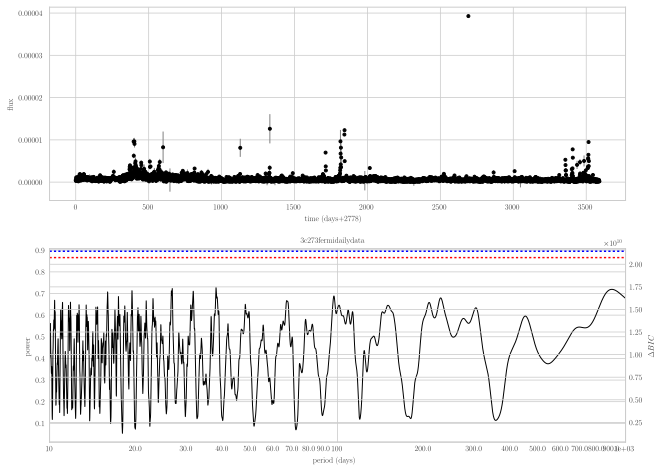

In [22]:
path='/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3C273_86400.lc'
lightcurve=pyfits.open(path)
#barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
header=lightcurve[0].header
time=lightcurve[1].data['START']
count=lightcurve[1].data['FLUX_100_300000']
counterr=lightcurve[1].data['ERROR_100_300000']
#plt.errorbar(time,count,counterr)
t =np.arange(len(time))
y_obs =count
dy=counterr

# Compute periodogram
period = 10 ** np.linspace(1, 3, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig3, sig2 = np.percentile(D,  [99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days+2778)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
#ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))
plt.title('3c273fermidailydata')
fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273_fermi_daily.pdf')

In [20]:
t[0],t[1],t[-1]

(2778.0, 2779.0, 6575.0)

In [8]:
sig3, sig2

(nan, nan)

In [24]:
lightcurve[1].data

FITS_rec([ (  2.39673600e+08,   2.40278400e+08, '3C 273',  187.27799988,  2.05200005,   2.02471142e-08,   4.61941552e-09,  1,   4.74431090e-08,   1.44848880e-08,  0,   2.33794495e-07,   5.89425539e-08,  0,  604800.,   5.97647171e+01),
          (  2.40278400e+08,   2.40883200e+08, '3C 273',  187.27799988,  2.05200005,   8.91824303e-09,   2.39405051e-09,  1,   6.73156180e-08,   1.81062152e-08,  0,   4.05899897e-07,   8.34414919e-08,  0,  604800.,   6.64643021e+01),
          (  2.40883200e+08,   2.41488000e+08, '3C 273',  187.27799988,  2.05200005,   8.25228152e-09,   2.18676610e-09,  1,   4.99820629e-08,   1.14557510e-08,  1,   2.04005062e-07,   6.72651268e-08,  0,  604800.,   2.80275040e+01),
          (  2.41488000e+08,   2.42092800e+08, '3C 273',  187.27799988,  2.05200005,   2.31930586e-09,   9.94689357e-13,  1,   2.74558101e-08,   8.15683343e-09,  1,   3.51421249e-07,   7.36348085e-08,  1,  604800.,   2.25118122e+01),
          (  2.42092800e+08,   2.42697600e+08, '3C 273',  187.2

In [ ]:
len(time)

In [28]:
lightcurve.info()

Filename: /Users/brettlv/blog/IHEP_sync/file_to_mac/data/3C273_604800.lc
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    LIGHTCURVES  BinTableHDU    375   533R x 16C   ['D', 'D', '6A', 'E', 'E', 'E', 'E', 'L', 'E', 'E', 'L', 'E', 'E', 'L', 'E', 'E']   


In [30]:
lightcurve[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   65 / length of dimension 1                          
NAXIS2  =                  533 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   16 / number of table fields                         
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** End of mandator

In [ ]:
len(time)

In [33]:
t[0],lightcurve[1].header['MJDREFI'],lightcurve[1].header['MJDREFF ']

(396.28571428571428, 51910.0, '7.428703703703703D-4')

In [35]:
t[0]+lightcurve[1].header['MJDREFI']+7.428e-4

52306.28645708572

In [12]:
path1='/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3C273_604800.lc'
lightcurve=pyfits.open(path1)
#barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
header=lightcurve[0].header
time=lightcurve[1].data['START']
count=lightcurve[1].data['FLUX_100_300000']
counterr=lightcurve[1].data['ERROR_100_300000']
#plt.errorbar(time,count,counterr)

t =np.arange(len(time))
y_obs =count
dy=counterr


In [15]:
len(t),time[0]/604800

(533, 396.28571428571428)

/Users/brettlv/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


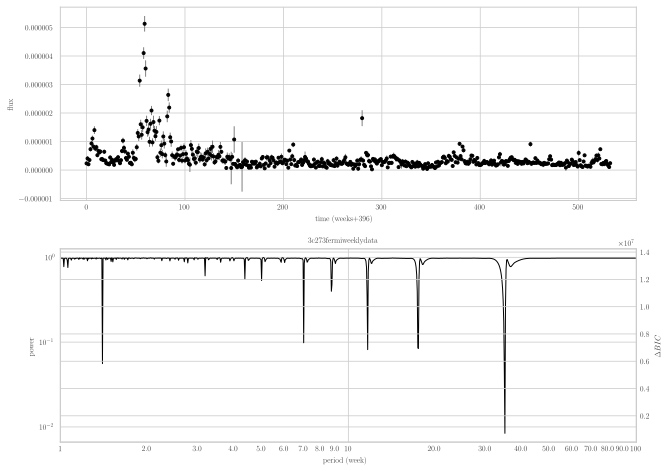

In [16]:
# Compute periodogram
period = 10 ** np.linspace(0, 2, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig3, sig2 = np.percentile(D,  [99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (weeks+396)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log',yscale='log')
#ax1.set_xscale('log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
#ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (week)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')


ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))
plt.title('3c273fermiweeklydata')
fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273_fermiweekly.pdf')

In [17]:
t

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [6]:
t[0],t[1],t[-1]

(396.28571428571428, 397.28571428571428, 938.0)

In [6]:
sig3, sig2

(nan, nan)

In [21]:
938*7

6566

In [ ]:
path1='/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3C273_604800.lc'
lightcurve=pyfits.open(path1)
#barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
header=lightcurve[0].header
time=lightcurve[1].data['START']
count=lightcurve[1].data['FLUX_100_300000']
counterr=lightcurve[1].data['ERROR_100_300000']


fig = plt.figure(figsize=(12, 6))
gs = plt.GridSpec(2, 2)

rng = np.random.RandomState(15566)

t =time
y =count
dy=counterr

ax = fig.add_subplot(gs[:, 0])
ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)

ax.set(xlabel='time/mjd',
       ylabel='signal',
       title='3c273 fermi weekly')

ls = LombScargle(t, y,dy)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=0.1,
                           samples_per_peak=10)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=0.1,
                       samples_per_peak=10)


ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())
ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')
fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273_frequency_fermiweekly.png',dpi=300)

In [38]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle

from scipy import integrate
import astropy
from astropy.time import Time

import pyfits
%matplotlib inline
plt.style.use('seaborn-whitegrid')


import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = plt.GridSpec(2, 2)

f = lambda x: 0.8 * np.sin(x)
rng = np.random.RandomState(15566)


path='/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3C273_86400.lc'
lightcurve=pyfits.open(path)
#barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
header=lightcurve[0].header
time=lightcurve[1].data['START']
count=lightcurve[1].data['FLUX_100_300000']
counterr=lightcurve[1].data['ERROR_100_300000']

t =time
y =count
dy=counterr

ax = fig.add_subplot(gs[:, 0])
ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
#ax.plot(tfit, f(tfit), '-k', color='gray')
ax.set(xlabel='time/mjd',
       ylabel='signal',
       title='3c273 fermi daily')

ls = LombScargle(t, y,dy)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=0.1,
                           samples_per_peak=10)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=0.1,
                       samples_per_peak=10)
#p = np.exp(p)

ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')

fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273_frequency_fermidaily.png',dpi=300)

In [46]:
t1mm = data3c273[data3c273['BAND']=='1mm']['mjd']
dy1mm =data3c273[data3c273['BAND']=='1mm']['ERROR']
y_obs1mm= data3c273[data3c273['BAND']=='1mm']['FLUX(JY)']

path='/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3C273_86400.lc'
lightcurve=pyfits.open(path)
#barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
header=lightcurve[0].header
time=lightcurve[1].data['START']
count=lightcurve[1].data['FLUX_100_300000']
counterr=lightcurve[1].data['ERROR_100_300000']
#plt.errorbar(time,count,counterr)
y_obsfermi =count
dyfermi=counterr
tfermi=time/86400+lightcurve[1].header['MJDREFI']+7.428e-4

t850 = data3c273[data3c273['BAND']=='850']['mjd']
dy850 =data3c273[data3c273['BAND']=='850']['ERROR']
y_obs850= data3c273[data3c273['BAND']=='850']['FLUX(JY)']


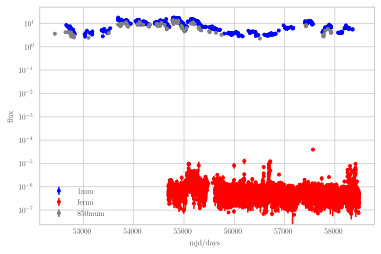

In [51]:
plt.errorbar(t1mm, y_obs1mm, dy1mm,c='blue',label='1mm',fmt='.')
plt.errorbar(tfermi, y_obsfermi, dyfermi,c='red',label='fermi',fmt='.')
plt.errorbar(t850, y_obs850, dy850,c='grey',label='850mum',fmt='.')
plt.xlabel('mjd/days')
plt.xlabel('mjd/days')
plt.ylabel('flux')
plt.semilogy()
plt.legend()
plt.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273_fermi_1mm_850.png',dpi=300)

In [42]:
data3c274

Unnamed: 0 BAND  day month  year      TIME OBSERV.  F(GHz)  FLUX(JY)  \
0             0  1mm    7   Apr  2003  05:27:00     SMA  235.60     1.940   
1             1  1mm   12   Aug  2003  05:53:00     SMA  236.00     2.032   
2             2  1mm   27   Jan  2004  08:57:00     SMA  224.75     1.388   
3             3  1mm    9   Feb  2004  06:25:00     SMA  226.30     1.629   
4             4  1mm    5   Mar  2004  07:05:00     SMA  226.30     1.689   
5             5  1mm   30   Apr  2004  05:03:00     SMA  225.08     1.299   
6             6  1mm   16   Jun  2004  01:15:00     SMA  225.52     1.503   
7             7  1mm   17   Jun  2004  04:41:00     SMA  225.59     1.494   
8             8  1mm   20   Jun  2004  05:11:00     SMA  225.52     1.812   
9             9  1mm   15   Feb  2006  09:33:00     SMA  225.55     1.515   
10           10  1mm   16   Feb  2006  11:14:00     SMA  233.74     1.518   
11           11  1mm    6   Mar  2006  08:54:00     SMA  225.59     1.774   
12           12  1mm   12   Mar  2006  09:30:00     SMA  221.38     1.759   
13           13  1mm   14   Apr  2006  07:56:00     SMA  225.55     1.666   
14           14  1mm    9   May  2006  04:41:00     SMA  225.51     1.934   
15           15  1mm   20   May  2006  08:02:00     SMA  225.55     1.777   
16           16  1mm    7   Jun  2006  08:04:00     SMA  235.60     1.701   
17           17  1mm   14   Jun  2006  06:02:00     SMA  230.59     1.679   
18           18  1mm   15   Jun  2006  06:26:00     SMA  225.56     1.700   
19           19  1mm   20   Jul  2006  06:01:00     SMA  225.56     1.949   
20           20  1mm   21   Jul  2006  06:03:00     SMA  225.48     1.876   
21           21  1mm    6   Dec  2006  18:13:00     SMA  271.76     1.686   
22           22  1mm   13   Dec  2006  16:42:00     SMA  220.57     1.982   
23           23  1mm   20   Dec  2006  14:09:00     SMA  225.52     1.913   
24           24  1mm   22   Dec  2006  14:18:00     SMA  220.52     1.891   
25           25  1mm   12   Jan  2007  12:37:00     SMA  221.53     1.846   
26           26  1mm    3   Feb  2007  15:13:00     SMA  225.60     1.644   
27           27  1mm    4   Feb  2007  12:13:00     SMA  225.56     1.673   
28           28  1mm    6   Feb  2007  15:40:00     SMA  240.05     1.634   
29           29  1mm   13   Feb  2007  15:39:00     SMA  239.98     1.458   
..          ...  ...  ...   ...   ...       ...     ...     ...       ...   
180         180  1mm   15   Jan  2017  15:42:00     SMA  224.99     1.481   
181         181  1mm   25   Feb  2017  13:53:00     SMA  239.96     1.072   
182         182  1mm   22   Apr  2017  13:54:00     SMA  224.97     1.531   
183         183  1mm   25   Apr  2017  10:29:00     SMA  220.67     1.679   
184         184  1mm   12   Jun  2017  05:50:00     SMA  229.49     1.830   
185         185  1mm    3   Jul  2017  08:19:00     SMA  237.92     1.572   
186         186  1mm    8   Nov  2017  15:36:00     SMA  225.54     1.265   
187         187  1mm   17   Nov  2017  17:24:00     SMA  225.52     1.275   
188         188  1mm   30   Dec  2017  14:14:00     SMA  263.69     1.186   
189         189  1mm    6   Jan  2018  14:13:00     SMA  225.51     1.393   
190         190  1mm    8   Jan  2018  15:03:00     SMA  266.97     1.064   
191         191  1mm   13   Jan  2018  14:17:00     SMA  221.33     1.335   
192         192  1mm   13   Jan  2018  14:16:00     SMA  255.28     1.073   
193         193  1mm   14   Jan  2018  12:26:00     SMA  212.97     1.138   
194         194  1mm   15   Jan  2018  13:35:00     SMA  212.97     1.339   
195         195  1mm   17   Jan  2018  18:37:00     SMA  225.52     1.252   
196         196  1mm   18   Jan  2018  13:11:00     SMA  225.52     1.326   
197         197  1mm   25   Jan  2018  16:08:00     SMA  229.52     1.350   
198         198  1mm   22   Mar  2018  08:32:00     SMA  235.56     1.510   
199         199  1mm   12   Apr  2018  07:25:00     SMA  229.53     1.338   
2

In [48]:
data3c274.columns

Index(['Unnamed: 0', 'BAND', 'day', 'month', 'year', 'TIME', 'OBSERV.',
       'F(GHz)', 'FLUX(JY)', '  ERROR  ', '  FLUX P.I.', 'mon_num', 'hour',
       'minute', 'mjd'],
      dtype='object')

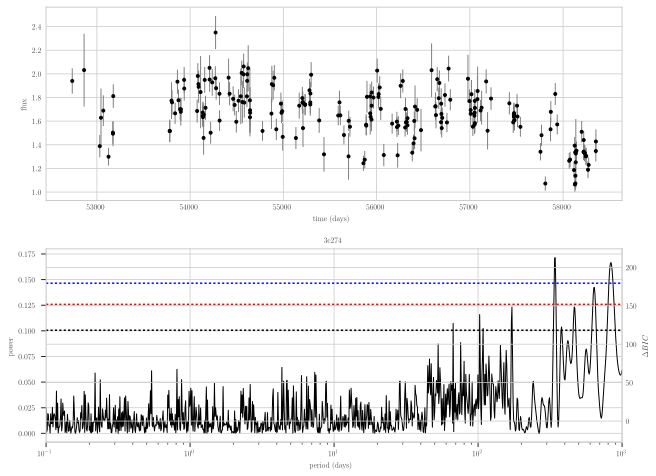

In [75]:
data3c274=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c274time.csv',header=0)
#data3c274=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c274time.csv')
#t1mm = data3c274[data3c274['BAND']=='1mm']['mjd']
#dy1mm =data3c274[data3c274['BAND']=='1mm']['  ERROR  ']
#y_obs1mm= data3c274[data3c274['BAND']=='1mm']['FLUX(JY)']
#t,dy,y_obs=getrangedata(t1mm,dy1mm,y_obs1mm,rangemin=53600,rangemax=55500)

t = data3c274[data3c274['BAND']=='1mm']['mjd']
dy =data3c274[data3c274['BAND']=='1mm']['  ERROR  ']
y_obs= data3c274[data3c274['BAND']=='1mm']['FLUX(JY)']
#

# Compute periodogram
period = 10 ** np.linspace(-1, 3, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))

plt.title('3c274')
fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c274_1mm_pds_sig_level.pdf')

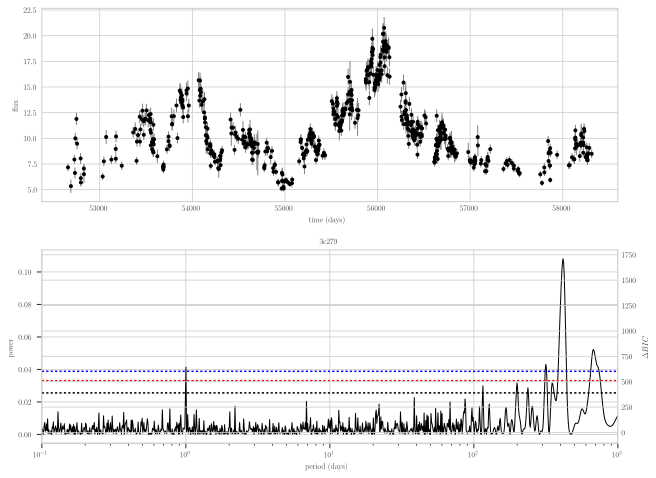

In [74]:
data3c279=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c279time.csv',header=0)
#data3c274=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c274time.csv')
#t1mm = data3c274[data3c274['BAND']=='1mm']['mjd']
#dy1mm =data3c274[data3c274['BAND']=='1mm']['  ERROR  ']
#y_obs1mm= data3c274[data3c274['BAND']=='1mm']['FLUX(JY)']
#t,dy,y_obs=getrangedata(t1mm,dy1mm,y_obs1mm,rangemin=53600,rangemax=55500)

t = data3c279[data3c279['BAND']=='1mm']['mjd']
dy =data3c279[data3c279['BAND']=='1mm']['ERROR']
y_obs= data3c279[data3c279['BAND']=='1mm']['FLUX(JY)']
#

# Compute periodogram
period = 10 ** np.linspace(-1, 3, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))

plt.title('3c279')
fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c279_1mm_pds_sig_level.pdf')

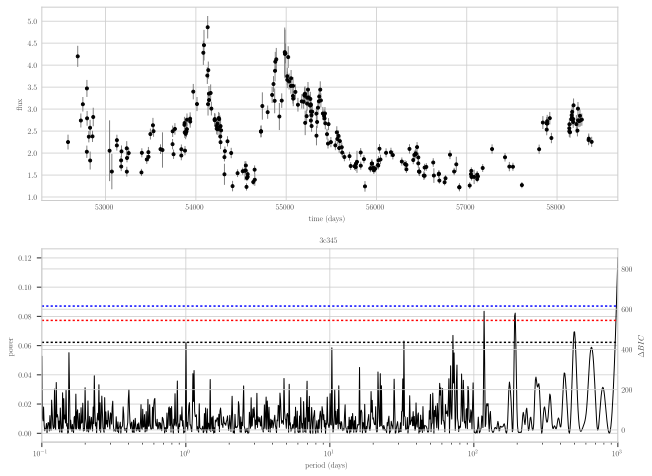

In [73]:
data3c345=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c345time.csv',header=0)
#data3c274=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c274time.csv')
#t1mm = data3c274[data3c274['BAND']=='1mm']['mjd']
#dy1mm =data3c274[data3c274['BAND']=='1mm']['  ERROR  ']
#y_obs1mm= data3c274[data3c274['BAND']=='1mm']['FLUX(JY)']
#t,dy,y_obs=getrangedata(t1mm,dy1mm,y_obs1mm,rangemin=53600,rangemax=55500)

t = data3c345[data3c345['BAND']=='1mm']['mjd']
dy =data3c345[data3c345['BAND']=='1mm']['ERROR']
y_obs= data3c345[data3c345['BAND']=='1mm']['FLUX(JY)']
#

# Compute periodogram
period = 10 ** np.linspace(-1, 3, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
#ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
#ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
#ax1.xaxis.set_major_locator(plt.LogLocator(10))
#ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))
plt.title('3c345')
fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c345_1mm_pds_sig_level.pdf')

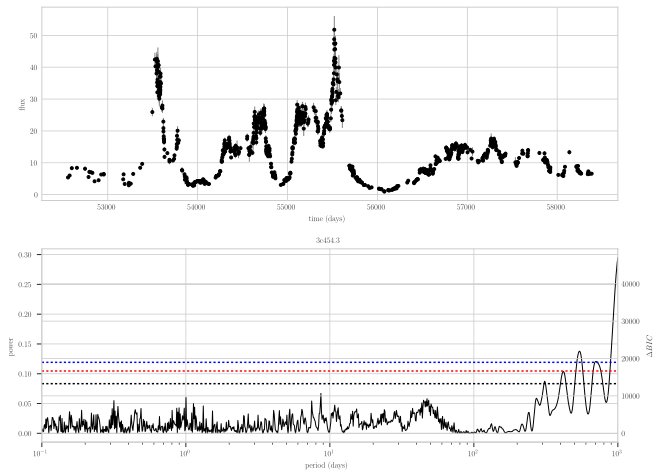

In [72]:
data3c454_3=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c454_3time.csv',header=0)
#data3c274=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c274time.csv')
#t1mm = data3c274[data3c274['BAND']=='1mm']['mjd']
#dy1mm =data3c274[data3c274['BAND']=='1mm']['  ERROR  ']
#y_obs1mm= data3c274[data3c274['BAND']=='1mm']['FLUX(JY)']
#t,dy,y_obs=getrangedata(t1mm,dy1mm,y_obs1mm,rangemin=53600,rangemax=55500)

t = data3c454_3[data3c454_3['BAND']=='1mm']['mjd']
dy =data3c454_3[data3c454_3['BAND']=='1mm']['ERROR']
y_obs= data3c454_3[data3c454_3['BAND']=='1mm']['FLUX(JY)']
#

# Compute periodogram
period = 10 ** np.linspace(-1, 3, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
plt.title('3c454.3')
fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c454.3_1mm_pds_sig_level.pdf')

In [71]:
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    #ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.patch.set_alpha(0.0)